In [1]:
#pip install fastai --upgrade

In [2]:
#! pip install kaggle

In [1]:
#! mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/.kaggle’: File exists


In [2]:
#! cp kaggle.json ~/.kaggle/

In [3]:
#! chmod 600 ~/.kaggle/kaggle.json

In [4]:
#! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18508       1437  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11169        783  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5719        370  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [5]:
#! pip install dtreeviz

     |████████████████████████████████| 62 kB 762 kB/s eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67923 sha256=015e25b6d5156eaa09028aec9c8abaed042d0f120f04c687c2393834a4e19d78
  Stored in directory: /home/.cache/pip/wheels/b7/44/95/93a3468ef218a345249de22ba72b4b534a7b9b2475e3a8fdb0
Successfully built dtreeviz
You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
#! pip install graphviz

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
import fastai
from fastai.tabular.all import *
from pathlib import Path
import os
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
import IPython
from IPython.display import Image, display_svg, SVG
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor

In [13]:
#if not path.exists() :
#  path.mkdir()
#  api.competition_download_cli('bluebook-for-bulldozers', path = path)
#  file_extract(path/'bluebook-for-bulldozers.zip')

In [10]:
#! kaggle competitions download -c bluebook-for-bulldozers

 99%|█████████████████████████████████████▋| 48.0M/48.4M [00:05<00:00, 10.6MB/s]
100%|██████████████████████████████████████| 48.4M/48.4M [00:05<00:00, 9.97MB/s]


In [12]:
#! unzip /home/fastai_ch9/bluebook-for-bulldozers.zip

Archive:  /home/fastai_ch9/bluebook-for-bulldozers.zip
  inflating: Data Dictionary.xlsx    
  inflating: Machine_Appendix.csv    
  inflating: Test.csv                
  inflating: Train.7z                
  inflating: Train.zip               
  inflating: TrainAndValid.7z        
  inflating: TrainAndValid.csv       
  inflating: TrainAndValid.zip       
  inflating: Valid.7z                
  inflating: Valid.csv               
  inflating: Valid.zip               
  inflating: ValidSolution.csv       
  inflating: median_benchmark.csv    
  inflating: random_forest_benchmark_test.csv  


In [2]:
df = pd.read_csv('TrainAndValid.csv', low_memory = False)

In [3]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df["ProductSize"].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large',
       'Compact'], dtype=object)

In [6]:
sizes = 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact'

In [7]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered = True, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [8]:
df["ProductSize"].unique()

[NaN, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact']
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [9]:
dep_var = 'SalePrice'
display(df[dep_var])
df[dep_var] = np.log(df[dep_var])
display(df[dep_var])

0         66000.0
1         57000.0
2         10000.0
3         38500.0
4         11000.0
           ...   
412693    10000.0
412694    10500.0
412695    12500.0
412696    10000.0
412697    13000.0
Name: SalePrice, Length: 412698, dtype: float64

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 412698, dtype: float64

In [10]:
df = add_datepart(df, 'saledate')

In [11]:
df_test = pd.read_csv('Test.csv', low_memory = False)
df_test = add_datepart(df_test, 'saledate')

In [12]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [13]:
df.saleYear.dtype

dtype('int64')

In [14]:
df.saleYear.max()

2012

In [15]:
df.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [16]:
cond = (df.saleYear<2011) | (df.saleMonth < 10)
train_idx = np.where(cond)[0]

In [17]:
valid_idx = np.where(~cond)[0]

In [18]:
splits = (list(train_idx), list(valid_idx))

In [19]:
cont, cat = cont_cat_split(df, 1, dep_var = dep_var)

In [20]:
cont

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleWeek',
 'saleDay',
 'saleDayofweek',
 'saleDayofyear',
 'saleElapsed']

In [21]:
cat

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs_quarter_end',
 'saleIs_quarter_start',
 'saleIs_year_end',
 'saleIs_year_start']

In [22]:
procs = [Categorify, FillMissing]

In [23]:
to = TabularPandas(df, procs, cat, cont, y_names = dep_var, splits = splits)

In [24]:
len(to.train), len(to.valid)

(404710, 7988)

In [25]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [26]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,963,...,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1745,...,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,336,...,57,1,1,1,1,1,1,1.077754e+09,1,1


In [27]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [28]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [29]:
m = DecisionTreeRegressor(max_leaf_nodes = 4)

In [30]:
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

In [31]:
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """Draws a representation of a random forest in IPython."""
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

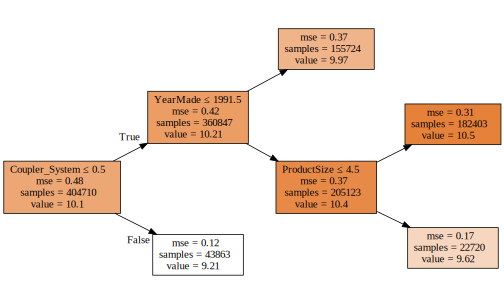

In [32]:
draw_tree(m, xs, size = 7 , precision = 2)

In [33]:
## explanation - first it takes the whole training set i.e 404710 rows and the avg value is 10.1. 
##               Then it splits using coupler system 
##               If coupler system is less than 0.5 then the avg value is 10.21 with squared error of 0.42.
##               and if the value is greater than 0.5 then the avg value is 9.21 and sq error is 0.12.
##               Next it splits using YearMade, if it is lower than 1991.5 then the avg value is 10.4 else 9.97
##               Finally it splits using productsize whether it is less than 4.5 or not

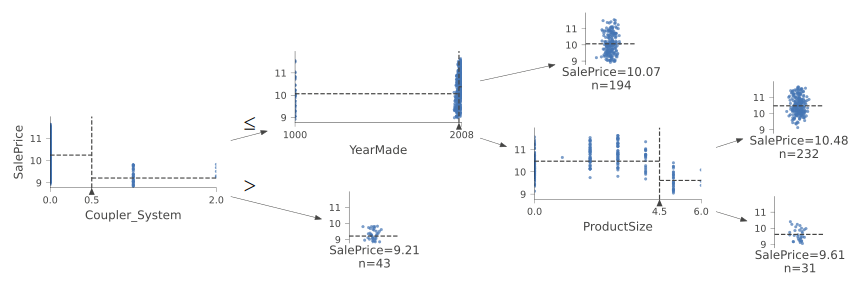

In [34]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, 
         fontname = 'DejaVu Sans', scale = 1.6, label_fontsize = 10, 
         orientation = 'LR')

In [35]:
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade'] < 1900, 'YearMade'] = 1950

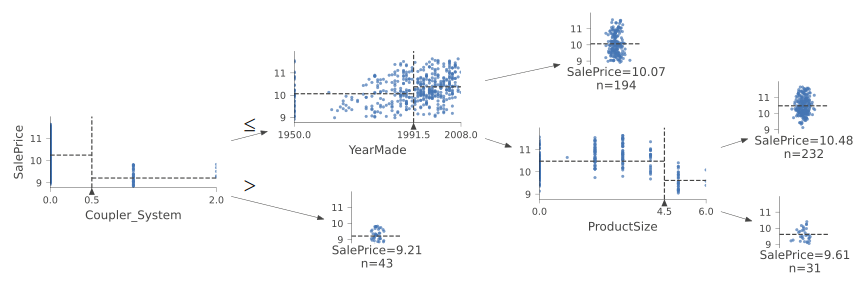

In [36]:
m = DecisionTreeRegressor(max_leaf_nodes = 4).fit(xs, y)
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, 
         fontname = 'DejaVu Sans', scale = 1.6, label_fontsize = 10,
         orientation = 'LR')

In [37]:
m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [38]:
def r_mse(pred, y) : return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [39]:
m_rmse(m, xs, y)

0.0

In [40]:
m_rmse(m, valid_xs, valid_y)

0.333088

In [41]:
m.get_n_leaves(), len(xs)

(324559, 404710)

In [42]:
m = DecisionTreeRegressor(min_samples_leaf = 25)
m.fit(xs, y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.211706, 0.268867)

In [43]:
m.get_n_leaves()

12400

In [44]:
def rf(xs,y, n_estimators = 40, max_samples = 200_000,
       max_features = 0.5, min_samples_leaf = 5, **kwargs):
  return RandomForestRegressor(n_jobs = -1, n_estimators = n_estimators,
                               max_samples = max_samples, max_features = max_features,
                               min_samples_leaf = min_samples_leaf, oob_score = True).fit(xs, y)

m = rf(xs, y)

In [45]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.170879, 0.231698)

In [46]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [47]:
preds.shape

(40, 7988)

In [48]:
preds.mean(0).shape

(7988,)

In [49]:
r_mse(preds.mean(0), valid_y)

0.231698

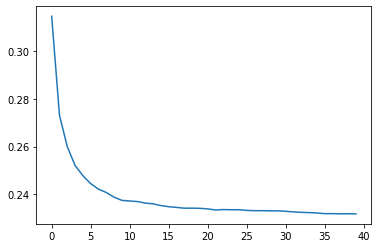

In [50]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

In [51]:
r_mse(m.oob_prediction_, y)

0.210662

In [52]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

preds.shape

(40, 7988)

In [53]:
preds_std = preds.std(0)

preds_std[:5]

array([0.25149167, 0.12681315, 0.09517514, 0.24271558, 0.12940399])

In [54]:
def rf_feat_importance(m, df):
  return pd.DataFrame({'cols' : df.columns, 'imp' : m.feature_importances_}).sort_values(by = 'imp', ascending = False)

In [55]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.182202
6,ProductSize,0.123960
30,Coupler_System,0.089416
7,fiProductClassDesc,0.074606
32,Hydraulics_Flow,0.069395
54,ModelID,0.057698
65,saleElapsed,0.049745
3,fiSecondaryDesc,0.042386
31,Grouser_Tracks,0.040390
1,fiModelDesc,0.029522


In [56]:
def plot_fi(fi):
  return fi.plot('cols', 'imp', 'barh', figsize = (12, 7), legend = False)

<AxesSubplot:ylabel='cols'>

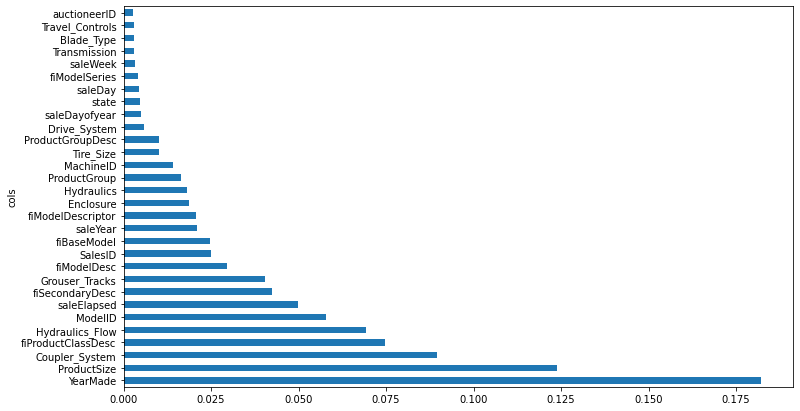

In [57]:
plot_fi(fi[:30])

In [58]:
to_keep = fi[fi.imp>0.005].cols

len(to_keep)

21

In [59]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y)

In [60]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181109, 0.230907)

<AxesSubplot:ylabel='cols'>

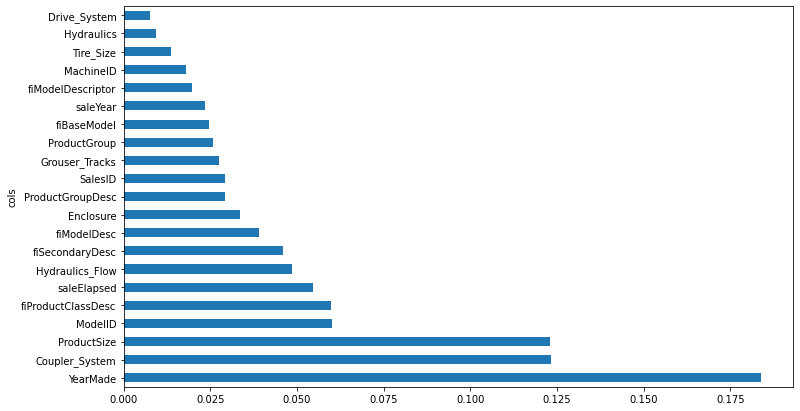

In [61]:
plot_fi(rf_feat_importance(m, xs_imp))

In [62]:
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

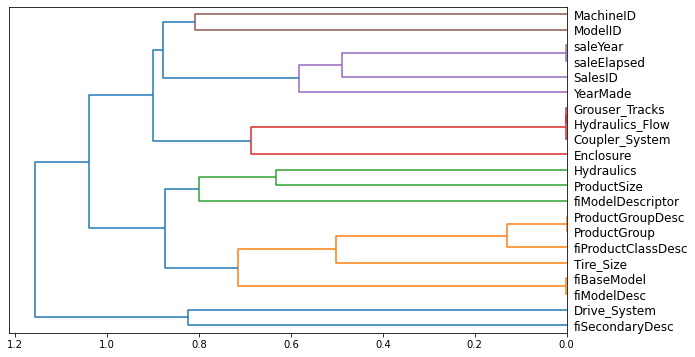

In [63]:
cluster_columns(xs_imp)

In [64]:
def get_oob(df):
  m = RandomForestRegressor(n_estimators = 40, min_samples_leaf = 15,
                            max_samples = 50000, max_features = 0.5, n_jobs = -1, oob_score = True)
  
  m.fit(df, y)

  return m.oob_score_

In [65]:
get_oob(xs_imp)

0.8769872829774357

In [66]:
## oob_score return the R2 value for oob data

In [67]:
{c:get_oob(xs_imp.drop(c, axis = 1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc', 'ProductGroup', 
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow', 'Grouser_Tracks', 'Coupler_System'
)}

{'saleYear': 0.8764803350400585,
 'saleElapsed': 0.8722876020344019,
 'ProductGroupDesc': 0.8771182576040553,
 'ProductGroup': 0.8781538503538275,
 'fiModelDesc': 0.8759902404641472,
 'fiBaseModel': 0.8758864623317802,
 'Hydraulics_Flow': 0.8771287699447977,
 'Grouser_Tracks': 0.8780264329815398,
 'Coupler_System': 0.8770824727015323}

In [68]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']

get_oob(xs_imp.drop(to_drop, axis = 1))

0.8745975446696606

In [69]:
xs_final = xs_imp.drop(to_drop, axis = 1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis = 1)

In [70]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.183062, 0.231524)

In [71]:
## partial dependence

([<matplotlib.axis.YTick at 0x7f55b56d0340>,
 [Text(0, 0, '#na#'),
  Text(0, 1, 'Large'),
  Text(0, 2, 'Large / Medium'),
  Text(0, 3, 'Medium'),
  Text(0, 4, 'Small'),
  Text(0, 5, 'Mini'),
  Text(0, 6, 'Compact')])

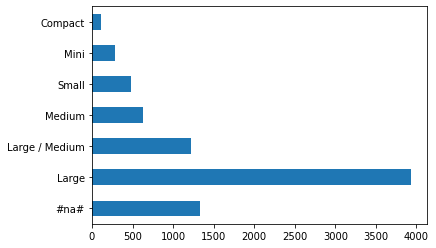

In [72]:
p = valid_xs_final['ProductSize'].value_counts(sort = False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c)

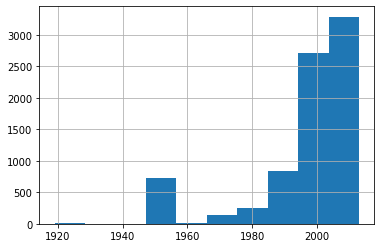

In [73]:
ax = valid_xs_final['YearMade'].hist()

In [74]:
from sklearn.inspection import plot_partial_dependence

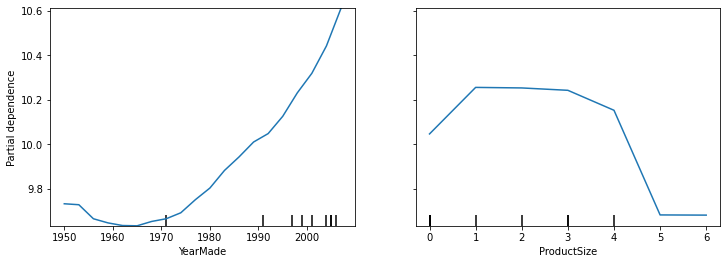

In [75]:
fig, ax = plt.subplots(figsize = (12, 4))
plot_partial_dependence(m, valid_xs_final, ['YearMade', 'ProductSize'],
                        grid_resolution = 20, ax = ax)

In [76]:
#! pip install treeinterpreter
#! pip install waterfallcharts

In [77]:
from treeinterpreter import treeinterpreter

In [78]:
row = valid_xs_final.iloc[:5]

In [79]:
prediction,bias, contributions = treeinterpreter.predict(m, row.values)

In [80]:
## prediction - simply the prediction our model makes
## bias - prediction based on taking the mean of the dependent variable.
## contribution - tells us the total change in prediction due to each independent variable.
## contribution + bias = prediction

In [81]:
prediction[0], bias[0], contributions[0].sum()

(array([9.96818823]), 10.104587821466444, -0.136399589172081)

In [82]:
bias[0] + contributions[0].sum()

9.968188232294363

In [83]:
len(xs)

404710

In [84]:
import waterfall_chart

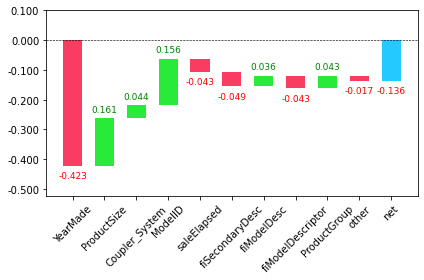

In [85]:
waterfall_chart.plot(valid_xs_final.columns, contributions[0], threshold = 0.08,
                     rotation_value = 45, formatting = '{:,.3f}');

In [86]:
## the extrapolation problem

CPU times: user 21.6 ms, sys: 8.03 ms, total: 29.6 ms
Wall time: 48.2 ms


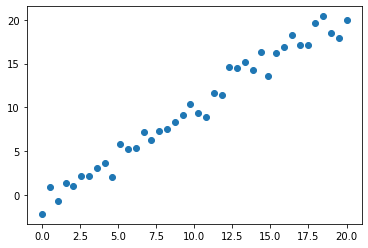

In [87]:
%%time
x_lin = torch.linspace(0, 20, steps = 40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin)

In [88]:
x_lin.shape

torch.Size([40])

In [89]:
xs_lin = x_lin.unsqueeze(1)
xs_lin.shape

torch.Size([40, 1])

In [90]:
x_lin[:, None].shape

torch.Size([40, 1])

In [91]:
m_lin = RandomForestRegressor().fit(xs_lin[:30], y_lin[:30])

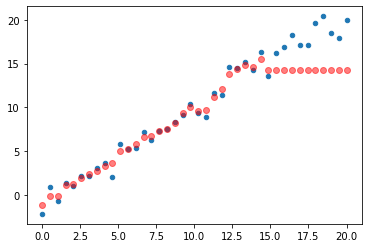

In [92]:
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color = 'red', alpha = 0.5)

In [93]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

In [94]:
m = rf(df_dom, is_valid)

In [95]:
rf_feat_importance(m, df_dom)[:6]

,cols,imp
6,saleElapsed,0.869252
9,SalesID,0.105892
14,MachineID,0.020739
0,YearMade,0.000807
5,ModelID,0.000590
11,Enclosure,0.000590


In [96]:
m = rf(xs_final, y)
print ('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID', 'saleElapsed', 'MachineID'):
    m = rf(xs_final.drop(c, axis = 1), y)
    print (c, m_rmse(m, valid_xs_final.drop(c, axis = 1), valid_y))

orig 0.233998
SalesID 0.230981
saleElapsed 0.235026
MachineID 0.230937


In [97]:
time_vars = ['SalesID', 'MachineID']
xs_final_time = xs_final.drop(time_vars, axis = 1)
valid_xs_time = valid_xs_final.drop(time_vars, axis = 1)

In [98]:
m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.229405

<AxesSubplot:>

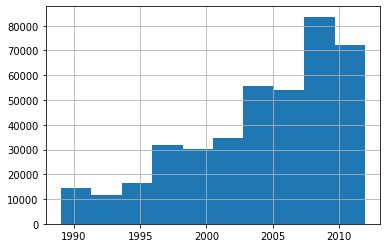

In [99]:
xs['saleYear'].hist()

In [100]:
filt = xs['saleYear'] > 2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.177617, 0.229374)

In [101]:
df_nn = pd.read_csv("TrainAndValid.csv", low_memory = False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered = True, inplace = True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [102]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [103]:
cont_nn, cat_nn = cont_cat_split(df_nn_final, max_card = 9000, dep_var = dep_var)

In [104]:
cat_nn

['YearMade',
 'ProductSize',
 'Coupler_System',
 'fiProductClassDesc',
 'Hydraulics_Flow',
 'ModelID',
 'fiSecondaryDesc',
 'fiModelDesc',
 'fiModelDescriptor',
 'Enclosure',
 'Hydraulics',
 'ProductGroup',
 'Tire_Size',
 'Drive_System']

In [105]:
cont_nn

['saleElapsed']

In [106]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
Hydraulics_Flow          3
ModelID               5281
fiSecondaryDesc        177
fiModelDesc           5059
fiModelDescriptor      140
Enclosure                6
Hydraulics              12
ProductGroup             6
Tire_Size               17
Drive_System             4
dtype: int64

In [107]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis = 1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis = 1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.176849, 0.230147)

In [108]:
cat_nn.remove('fiModelDescriptor')

In [109]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, splits = splits, y_names = dep_var)

In [110]:
dls = to_nn.dataloaders(1024, device = "cuda")

In [111]:
y = to_nn.train.y

In [112]:
y.min(), y.max()

(8.465899, 11.863583)

In [113]:
learn = tabular_learner(dls, y_range = (8, 12), layers = [500, 250], 
                        n_out = 1, loss_func = F.mse_loss)

CPU times: user 4.31 s, sys: 1.89 s, total: 6.2 s
Wall time: 6.19 s


/opt/conda/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0002290867705596611)

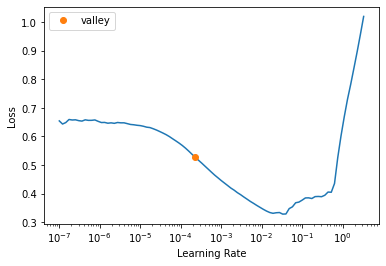

In [114]:
%%time
learn.lr_find()

In [116]:
%%time
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.062730,0.068403,00:04
1,0.053585,0.066319,00:04
2,0.048045,0.052751,00:04
3,0.043392,0.049765,00:04
4,0.040362,0.050155,00:04


CPU times: user 24.3 s, sys: 287 ms, total: 24.6 s
Wall time: 24.4 s


CPU times: user 41.9 ms, sys: 4.04 ms, total: 45.9 ms
Wall time: 41.6 ms


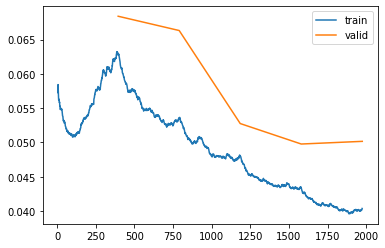

In [117]:
%%time
learn.recorder.plot_loss()

In [118]:
%%time
preds, targs = learn.get_preds()
r_mse(preds, targs)

CPU times: user 105 ms, sys: 16.1 ms, total: 121 ms
Wall time: 97.5 ms


0.223953

In [119]:
#learn.save('nn')

In [120]:
help(tabular_learner)

Help on function tabular_learner in module fastai.tabular.learner:

tabular_learner(dls, layers=None, emb_szs=None, config=None, n_out=None, y_range=None, loss_func=None, opt_func=<function Adam at 0x7f54801150d0>, lr=0.001, splitter=<function trainable_params at 0x7f548a235dc0>, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))
    Get a `Learner` using `dls`, with `metrics`, including a `TabularModel` created using the remaining params.



In [121]:
help(TabularModel)

Help on class TabularModel in module fastai.tabular.model:

class TabularModel(fastai.torch_core.Module)
 |  TabularModel(emb_szs, n_cont, out_sz, layers, ps=None, embed_p=0.0, y_range=None, use_bn=True, bn_final=False, bn_cont=True, act_cls=ReLU(inplace=True), lin_first=True)
 |  
 |  Basic model for tabular data.
 |  
 |  Method resolution order:
 |      TabularModel
 |      fastai.torch_core.Module
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, emb_szs, n_cont, out_sz, layers, ps=None, embed_p=0.0, y_range=None, use_bn=True, bn_final=False, bn_cont=True, act_cls=ReLU(inplace=True), lin_first=True)
 |      Initializes internal Module state, shared by both nn.Module and ScriptModule.
 |  
 |  forward(self, x_cat, x_cont=None)
 |      Defines the computation performed at every call.
 |      
 |      Should be overridden by all subclasses.
 |      
 |      .. note::
 |          Although the recipe for forward pass ne

In [122]:
# ensembling both random forest and renural networks

In [124]:
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze()) + rf_preds) / 2

In [125]:
r_mse(ens_preds, valid_y)

0.221247